In [227]:
# Recurrent Neural Network
# Part 1 - Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset, which includes all firms in all years
dataset = pd.read_csv('prices-split-adjusted.csv')

In [228]:
dataset.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [229]:
# choose one firm
dataset_A = dataset[dataset.symbol=='A']
dataset_A.sort_values('date',inplace=True)
dataset_A.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,symbol,open,close,low,high,volume
251,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0
718,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0
1186,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0
1654,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0
2122,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0
2590,2010-01-11,A,22.088697,22.045780,21.938484,22.210300,4781500.0
3058,2010-01-12,A,21.859800,21.781117,21.616594,21.924177,2871000.0
3526,2010-01-13,A,21.795421,21.952789,21.494994,22.017168,3418900.0
3994,2010-01-14,A,21.881258,22.281832,21.816881,22.346209,6163700.0
4462,2010-01-15,A,22.331903,21.766810,21.695278,22.432045,4626600.0


In [230]:
dataset_A.shape

(1762, 7)

In [231]:
#setting index as date
dataset_A['date'] = pd.to_datetime(dataset_A.date,format='%Y-%m-%d')
dataset_A.index = dataset_A['date']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [232]:
#While splitting the data into train and validation, we cannot use random splitting since that will destroy the time component. 
#So here I have set the last year’s data into validation and the 4 years’ data before that into train.
dataset_train = dataset_A.iloc[:int(dataset_A.shape[0]*.7)]
dataset_test = dataset_A.iloc[int(dataset_A.shape[0]*.7):]

In [233]:
#can't use ataset_train.iloc[:, 2], which is pandas series instead of dataframe
#training_set = dataset_train.iloc[:, 3:4].values
training_set = dataset_train[['close']].values
training_set

array([[22.38912804],
       [22.14592346],
       [22.06723963],
       ...,
       [41.259998  ],
       [42.25      ],
       [42.25      ]])

In [234]:
training_set.shape

(1233, 1)

In [235]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [236]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [237]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [238]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [239]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1173/1173 [==============================] - 19s 16ms/step - loss: 0.0495
Epoch 2/10
1173/1173 [==============================] - 10s 8ms/step - loss: 0.0095
Epoch 3/10
1173/1173 [==============================] - 10s 8ms/step - loss: 0.0083
Epoch 4/10
1173/1173 [==============================] - 10s 8ms/step - loss: 0.0075
Epoch 5/10
1173/1173 [==============================] - 10s 8ms/step - loss: 0.0069
Epoch 6/10
1173/1173 [==============================] - 10s 8ms/step - loss: 0.0067
Epoch 7/10
1173/1173 [==============================] - 14s 12ms/step - loss: 0.0070
Epoch 8/10
1173/1173 [==============================] - 10s 9ms/step - loss: 0.0068
Epoch 9/10
1173/1173 [==============================] - 11s 9ms/step - loss: 0.0059
Epoch 10/10
1173/1173 [==============================] - 14s 12ms/step - loss: 0.0059


In [240]:
dataset_test.head()

,date,symbol,open,close,low,high,volume
date,,,,,,,
2014-11-25,2014-11-25,A,42.330002,42.709999,42.310001,42.869999,2713900.0
2014-11-26,2014-11-26,A,42.680000,42.740002,42.529999,42.869999,1752700.0
2014-11-28,2014-11-28,A,42.740002,42.740002,42.590000,42.990002,1091800.0
2014-12-01,2014-12-01,A,42.689999,41.590000,41.580002,42.730000,4411200.0
2014-12-02,2014-12-02,A,41.599998,41.980000,41.549999,42.099998,2014400.0


In [241]:
dataset_test.shape

(529, 7)

In [242]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
real_stock_price = dataset_test[['close']].values
dataset_total = dataset_A[['close']]
# dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
#predicting 529 values, using past 60 from the train data
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [244]:
inputs = inputs.reshape(-1,1)
inputs.shape

(589, 1)

In [245]:
inputs = sc.transform(inputs)

In [246]:
X_test = []
#for i in range(60, len(dataset_test)): 不能用len(dataset_test)，会少60个prediction
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [247]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

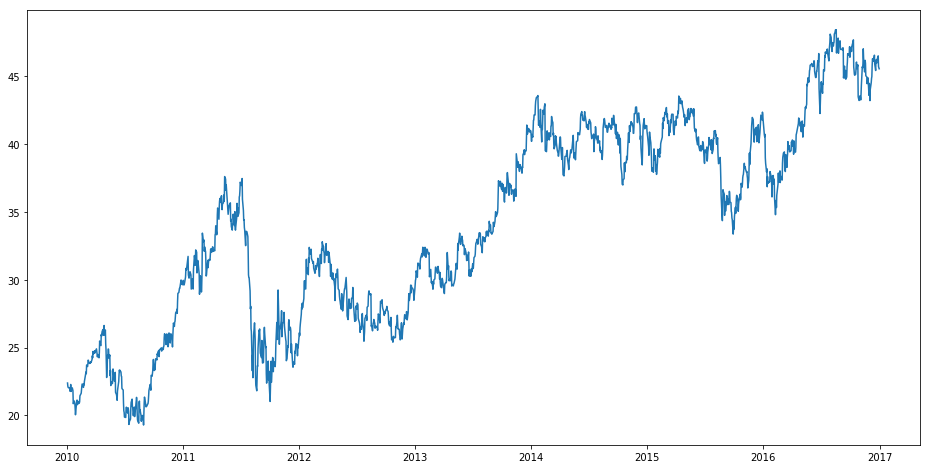

In [250]:
# Visualising the results
plt.figure(figsize=(16,8))
plt.plot(dataset_A['close'], label='Close Price history')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


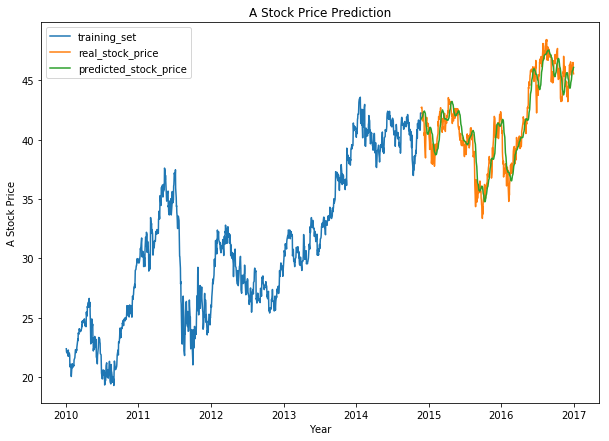

In [261]:
plt.figure(figsize=(10,7))

dataset_test['Predictions'] = predicted_stock_price
plt.plot(dataset_train[['close']],label='training_set')
plt.plot(dataset_test[['close']], label='real_stock_price')
plt.plot(dataset_test[['Predictions']], label='predicted_stock_price')

plt.title('A Stock Price Prediction')
#plt.xlabel('Time')
plt.xlabel('Year')
plt.ylabel('A Stock Price')
plt.legend()


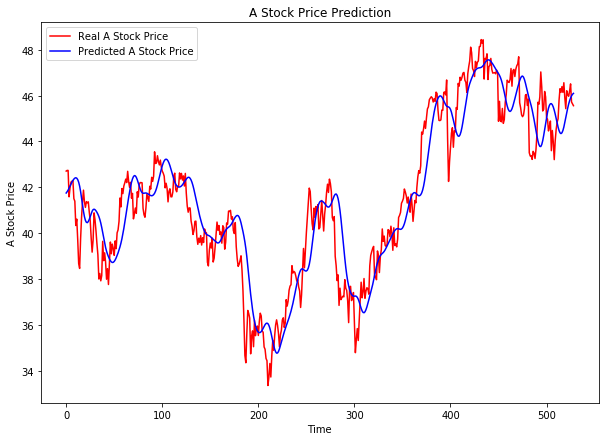

In [264]:
# Visualising the results
plt.figure(figsize=(10,7))
plt.plot(real_stock_price, color = 'red', label = 'Real A Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted A Stock Price')
plt.title('A Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('A Stock Price')
plt.legend()
plt.show()

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(predicted_stock_price,real_stock_price)

# Wrap it up

In [285]:
def dataTransform(MSFT): # MSFT should be string
    dataset_MSFT = dataset[dataset.symbol==MSFT]
    #setting index as date
    dataset_MSFT['date'] = pd.to_datetime(dataset_MSFT.date,format='%Y-%m-%d')
    dataset_MSFT.index = dataset_MSFT['date']

    #While splitting the data into train and validation, we cannot use random splitting since that will destroy the time component. 
    #So here I have set the last year’s data into validation and the 4 years’ data before that into train.
    dataset_train = dataset_MSFT.iloc[:int(dataset_A.shape[0]*.75)]
    dataset_test = dataset_MSFT.iloc[int(dataset_A.shape[0]*.75):]

    training_set = dataset_train[['close']].values

    # Feature Scaling
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    # Creating a data structure with 60 timesteps and 1 output
    X_train = []
    y_train = []
    for i in range(60, len(training_set_scaled)):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshaping
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    return dataset_train, dataset_test, X_train, y_train

In [286]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [287]:
def LSTM_train(X_train, y_train):
    # Initialising the RNN
    regressor = Sequential()

    # Adding the first LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    # Adding a second LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a third LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))

    # Adding a fourth LSTM layer and some Dropout regularisation
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN

    #regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set

    regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)
    
    return regressor

In [288]:
# Part 3 - Making the predictions and visualising the results
def LSTM_predict(dataset_test, dataset_MSFT):
    # Getting the real stock price of 2017
    real_stock_price = dataset_test[['close']].values
    dataset_total = dataset_MSFT[['close']]
    # dataset_total = pd.concat((dataset_train['close'], dataset_test['close']), axis = 0)
    #predicting 529 values, using past 60 from the train data
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

    inputs = inputs.reshape(-1,1)
    inputs.shape

    inputs = sc.transform(inputs)

    X_test = []
    #for i in range(60, len(dataset_test)): 不能用len(dataset_test)，会少60个prediction
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    predicted_stock_price = regressor.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)
    return predicted_stock_price, real_stock_price

In [289]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Starts from here

In [335]:
dataset_train, dataset_test, X_train, y_train = dataTransform('AAL')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [336]:
regressor = LSTM_train(X_train, y_train)

Epoch 1/10
1261/1261 [==============================] - 14s 11ms/step - loss: 0.0251
Epoch 2/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 3/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0029
Epoch 4/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 5/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0034
Epoch 6/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0030
Epoch 7/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0027
Epoch 8/10
1261/1261 [==============================] - 7s 6ms/step - loss: 0.0032
Epoch 9/10
1261/1261 [==============================] - 9s 7ms/step - loss: 0.0029
Epoch 10/10
1261/1261 [==============================] - 8s 6ms/step - loss: 0.0026


In [323]:
dataset_test.head()

,date,symbol,open,close,low,high,volume
date,,,,,,,
2015-04-06,2015-04-06,INTC,30.809999,31.040001,30.450001,31.250000,21490900.0
2015-04-07,2015-04-07,INTC,31.070000,31.260000,31.000000,31.590000,23258300.0
2015-04-08,2015-04-08,INTC,31.230000,31.309999,31.059999,31.559999,18250300.0
2015-04-09,2015-04-09,INTC,30.680000,31.240000,30.570000,31.620001,34167600.0
2015-04-10,2015-04-10,INTC,31.330000,31.930000,31.330000,31.940001,28084900.0


In [301]:
dataset_test.shape

(441, 7)

In [337]:
predicted_stock_price, real_stock_price = LSTM_predict(dataset_test, dataset_MSFT)

In [314]:
rmse_GOOGL = rmse(real_stock_price, predicted_stock_price) 
rmse_GOOGL

670.1417030004126

In [308]:
rmse_AMZN = rmse(real_stock_price, predicted_stock_price) 
rmse_AMZN

588.5752086119738

In [304]:
rmse_AAPL

62.795495220919086

In [319]:
rmse_HP = rmse(real_stock_price, predicted_stock_price) 
rmse_HP 

36.70951405783101

In [338]:
rmse_AAL = rmse(real_stock_price, predicted_stock_price) 
rmse_AAL

9.757798497416783

In [334]:
rmse_TGT = rmse(real_stock_price, predicted_stock_price) 
rmse_TGT

26.139937560489862

In [329]:
rmse_IBM = rmse(real_stock_price, predicted_stock_price) 

In [330]:
rmse_IBM

104.42951468517634

In [325]:
rmse_INTC = rmse(real_stock_price, predicted_stock_price) 
rmse_INTC

16.277018452283762

In [295]:
rmse_MSFT = rmse(real_stock_price, predicted_stock_price) 

5.846468303973473

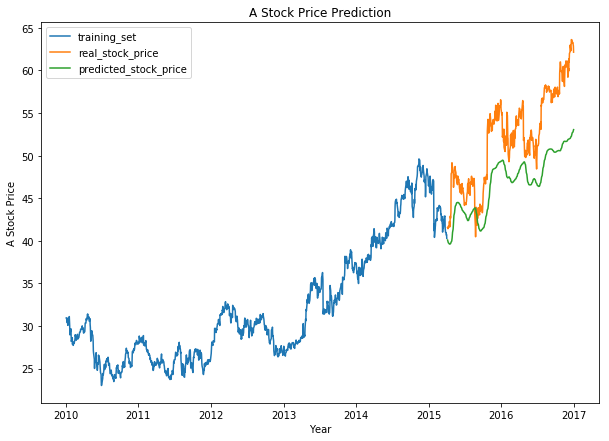

In [296]:
plt.figure(figsize=(10,7))

dataset_test['Predictions'] = predicted_stock_price
plt.plot(dataset_train[['close']],label='training_set')
plt.plot(dataset_test[['close']], label='real_stock_price')
plt.plot(dataset_test[['Predictions']], label='predicted_stock_price')

plt.title('A Stock Price Prediction')
#plt.xlabel('Time')
plt.xlabel('Year')
plt.ylabel('A Stock Price')
plt.legend()


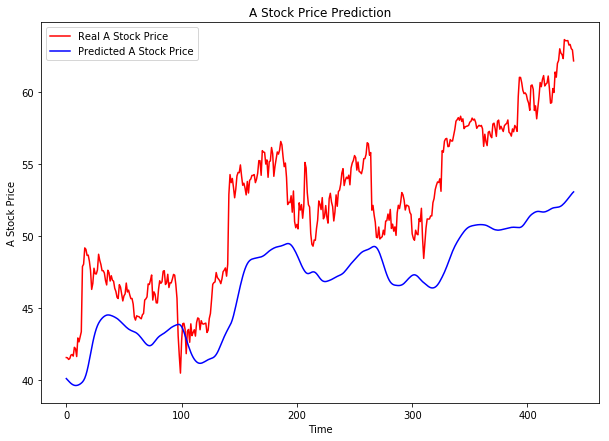

In [297]:
# Visualising the results
plt.figure(figsize=(10,7))
plt.plot(real_stock_price, color = 'red', label = 'Real A Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted A Stock Price')
plt.title('A Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('A Stock Price')
plt.legend()
plt.show()

# Insight

## Percent Change

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


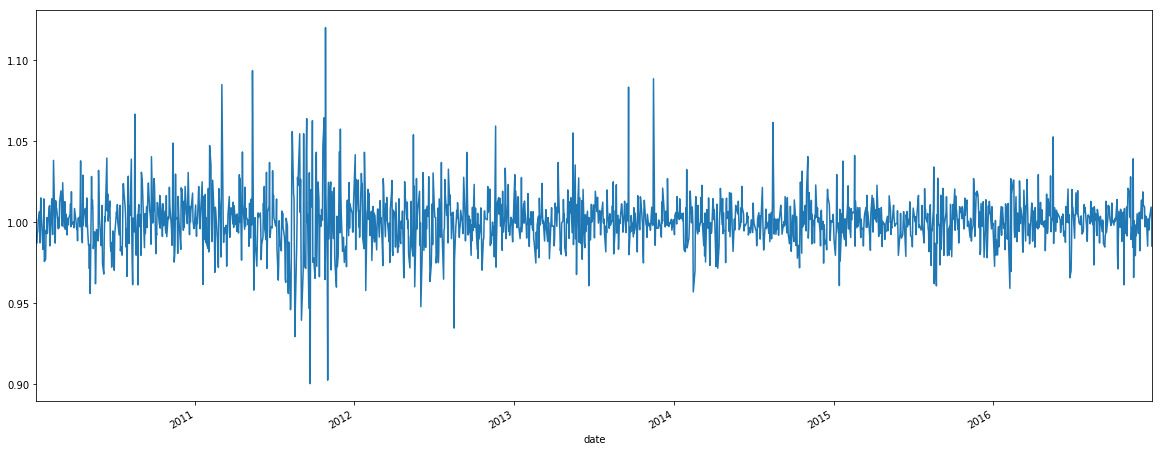

In [265]:
dataset_A['Change'] = dataset_A.high.div(dataset_A.high.shift())
dataset_A['Change'].plot(figsize=(20,8))

## stock returns

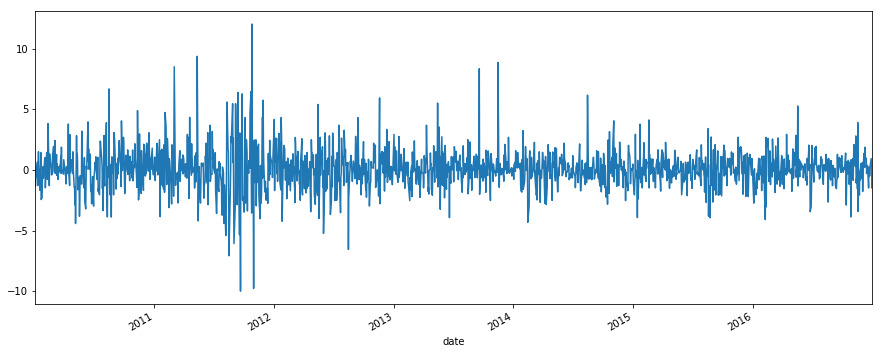

In [267]:
dataset_A.high.pct_change().mul(100).plot(figsize=(15,6))

## Companies comparison

In [276]:
dataset_MSFT = dataset[dataset.symbol=='MSFT']
dataset_MSFT.head()
#setting index as date
dataset_MSFT['date'] = pd.to_datetime(dataset_A.date,format='%Y-%m-%d')
dataset_MSFT.index = dataset_A['date']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [277]:
dataset_GOOGL = dataset[dataset.symbol=='GOOGL']
dataset_GOOGL.head()
#setting index as date
dataset_GOOGL['date'] = pd.to_datetime(dataset_A.date,format='%Y-%m-%d')
dataset_GOOGL.index = dataset_A['date']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


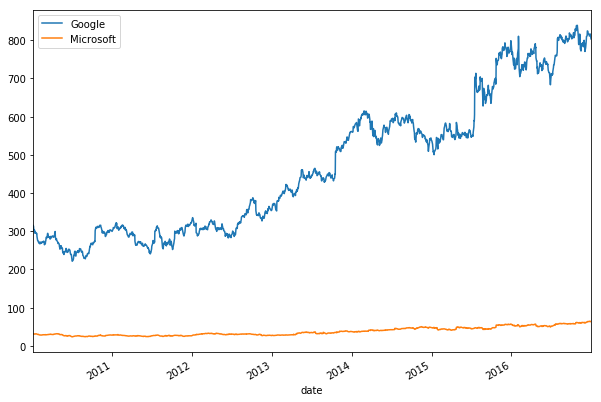

In [278]:
# Plotting before normalization
dataset_GOOGL.high.plot(figsize=(10,7))
dataset_MSFT.high.plot(figsize=(10,7))
#plt.figure(figsize=(10,7))
plt.legend(['Google','Microsoft'])
plt.show()

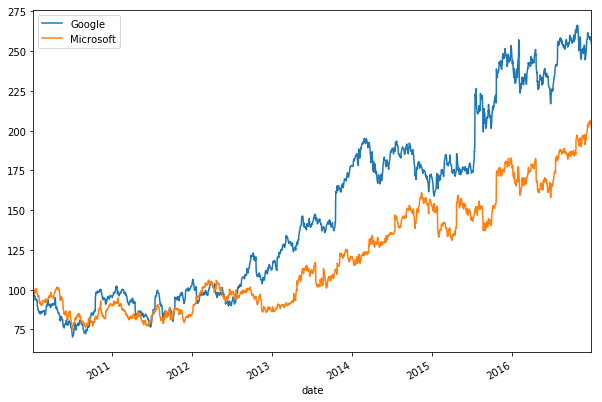

In [283]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = dataset_GOOGL.high.div(dataset_GOOGL.high.iloc[0]).mul(100)
normalized_microsoft = dataset_MSFT.high.div(dataset_MSFT.high.iloc[0]).mul(100)
normalized_google.plot(figsize=(10,7))
normalized_microsoft.plot(figsize=(10,7))
plt.legend(['Google','Microsoft'])
plt.show()